In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
taiwan_real_estate = pd.read_csv('./taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [14]:


# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [15]:

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params) 
# from statsmodels.regression.linear_model import OLS as mdl_price_vs_conv
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
print(prediction_data)

Intercept        8.224237
n_convenience    0.798080
dtype: float64
    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


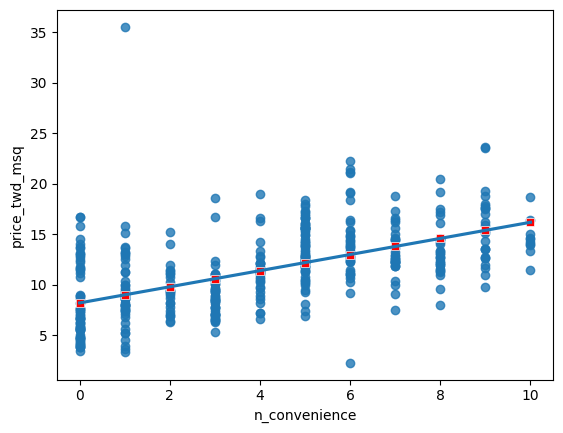

In [16]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color="red",
                marker="s")

# Show the layered plot
plt.show()

In [17]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience': [-1,2.5]})

In [18]:
mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

In [19]:
# Print the model parameters of mdl_price_vs_conv
(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [21]:
# Print the fitted values of mdl_price_vs_conv
(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [22]:
# Print the residuals of mdl_price_vs_conv
(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [26]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.41e-37
Time:                        00:38:20   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [28]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_59864\389167048.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_59864\389167048.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


,n_convenience,predictions_auto
0,8.224237,8.224237
1,9.022317,9.022317
2,9.820397,9.820397
3,10.618477,10.618477
4,11.416556,11.416556
5,12.214636,12.214636
6,13.012716,13.012716
7,13.810795,13.810795
8,14.608875,14.608875
9,15.406955,15.406955


In [29]:
sp500_yearly_returns = pd.read_csv("./sp500_yearly_returns.csv")
sp500_yearly_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       493 non-null    object 
 1   return_2018  493 non-null    float64
 2   return_2019  493 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


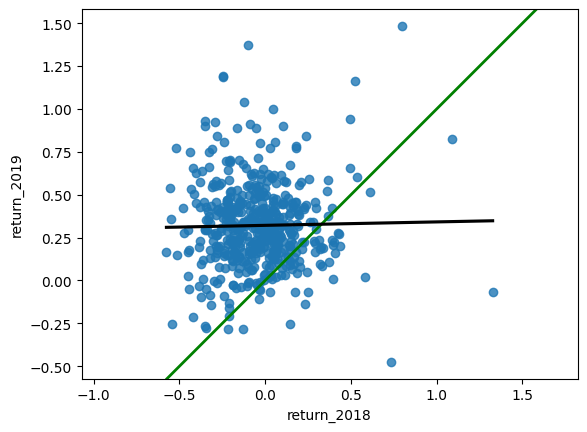

In [30]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500_yearly_returns,
            ci = None,
            line_kws={"color": "black"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

In [35]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})

# Use mdl_returns to predict with explanatory_data

(mdl_returns.params,mdl_returns.predict(explanatory_data))

(Intercept      0.321321
 return_2018    0.020069
 dtype: float64,
 0    0.301251
 1    0.321321
 2    0.341390
 dtype: float64)

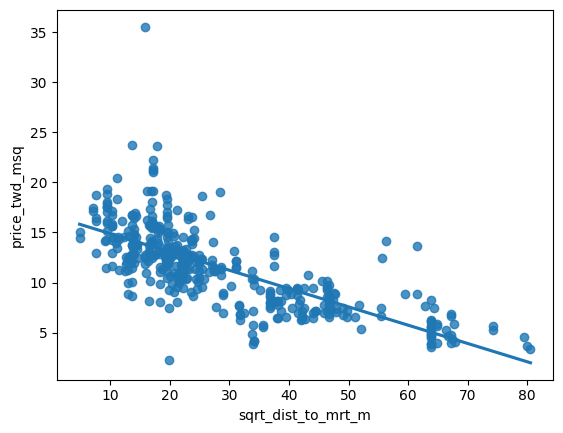

In [36]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(
taiwan_real_estate["dist_to_mrt_m"])


plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
plt.show()

In [37]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
display(mdl_price_vs_dist.params)


Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [38]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


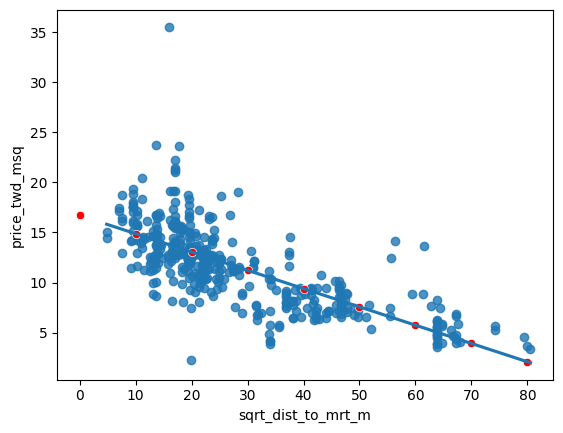

In [39]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data = prediction_data, x="sqrt_dist_to_mrt_m", y="price_twd_msq", color="red")
plt.show()

In [41]:
ad_conversion = pd.read_csv("./ad_conversion.csv")
display(ad_conversion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   spent_usd      936 non-null    float64
 1   n_impressions  936 non-null    int64  
 2   n_clicks       936 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 22.1 KB


None

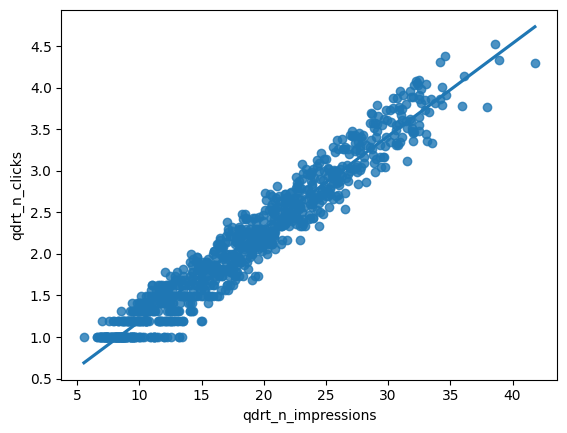

In [42]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"], 0.25) 
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"], 0.25)

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions",
            y="qdrt_n_clicks",
            data=ad_conversion,
            ci=None)
plt.show()

In [43]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
display(prediction_data)

,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


In [45]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
(prediction_data)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


In [46]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] **4
display(prediction_data)

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0.0,0.071748,0.000026
1,26.591479,500000.0,3.037576,85.135121
2,31.622777,1000000.0,3.598732,167.725102
3,34.996355,1500000.0,3.974998,249.659131
4,37.606031,2000000.0,4.266063,331.214159
5,39.763536,2500000.0,4.506696,412.508546
6,41.617915,3000000.0,4.713520,493.607180


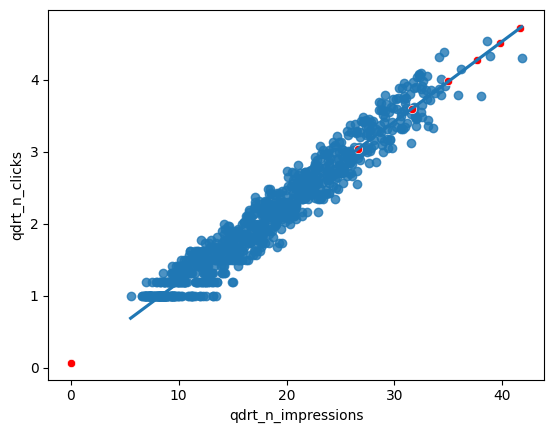

In [47]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color="red")
plt.show()